### Цветовая обработка изображения

### Применение горизонтальных и вертикальных свёрточных фильтров

In [25]:
import numpy as np
from scipy import misc
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
import os

In [26]:
image_path = os.path.abspath('./figures/lines.jpeg') # Путь к изображению
image = mpimg.imread(image_path) # приведение изображения в тензор c 3 каналами цвета

img type:<class 'numpy.ndarray'>
img size:(864, 1152, 3)


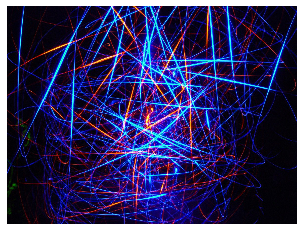

In [27]:
# визуализация
plt.imshow(image) 
plt.grid(False)
plt.gray()
plt.axis('off')
print(f'img type:{type(image)}')
print(f'img size:{image.shape}')
plt.show()

img type:<class 'numpy.ndarray'>
img size:(864, 1152)


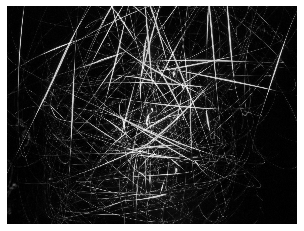

In [28]:
# Приведение к изображение к черно-белому варианту в виде двумерной матрицы
gray_img = rgb2gray(image)
# gray_img = np.mean(image, axis=2) # усреднение по каналам немного снижает насыщенность изображения
plt.imshow(gray_img)
plt.axis('off')
print(f'img type:{type(gray_img)}')
print(f'img size:{gray_img.shape}')
plt.show()

In [29]:
# i = np.copy(gray_img)
# i_transformed = np.copy(gray_img)
# size_x = i_transformed.shape[0]
# size_y = i_transformed.shape[1]

In [30]:
img_copy = np.copy(gray_img)
# Ядра свёртки для детектирования горизонтальных и вертикальных линий
h_filter = [[-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1]]

v_filter = [[-1,-1,-1],
            [0, 0, 0],
            [1, 1, 1]]

In [47]:
def perform_and_plot_conv_filter(i, filter, weight=1):
    
    """
    Пошаговое применение фильтра свёртки
    core: (3,3),
    stride: 1,
    padding: 0
    """
    
    i_transformed = i.copy()
    size_x = i.shape[0]
    size_y = i.shape[1]
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            convolution = 0.0
            convolution += (i[x - 1, y-1] * filter[0][0])
            convolution += (i[x, y-1] * filter[0][1])
            convolution += (i[x + 1, y-1] * filter[0][2])
            convolution += (i[x-1, y] * filter[1][0])
            convolution += (i[x, y] * filter[1][1])
            convolution += (i[x+1, y] * filter[1][2])
            convolution += (i[x-1, y+1] * filter[2][0])
            convolution += (i[x, y+1] * filter[2][1])
            convolution += (i[x+1, y+1] * filter[2][2])
            convolution *= weight
            if(convolution<0):
                convolution=0
            if(convolution>255):
                convolution=255
            i_transformed[x, y] = convolution
            
    # Вывод изображения
    plt.gray()
    plt.grid(False)
    plt.imshow(i_transformed)
    plt.axis('off')
    plt.show()

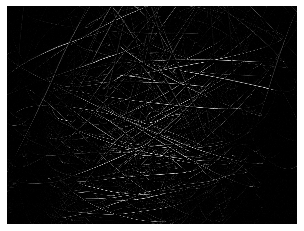

Wall time: 6.42 s


In [48]:
%%time
perform_and_plot_conv_filter(img_copy, h_filter)

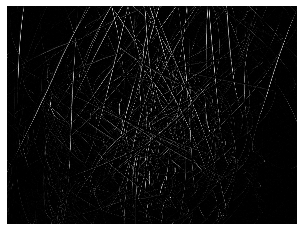

Wall time: 6.55 s


In [49]:
%%time
perform_and_plot_conv_filter(img_copy, v_filter)